In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from Darknet_Classification_FeatureSel.classification import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
random_state = 42
dataset_folder = "dataset/processed_dataset/" 
img_folder = "imgs/"

np.random.seed(random_state)
plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams["savefig.format"] = 'jpg'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 18})

In [3]:
samples = pd.read_csv(dataset_folder + "darknet_dataset_processed_encoded.csv")
samples = samples[samples['Label'] == 'Darknet']
del samples['Label']
samples.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label.1
117170,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.683488e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117171,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.558961e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117172,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,3.301057e+07,1.456330e+15,1.456330e+15,Audio-Streaming
117173,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,5.227810e+05,1.456330e+15,1.456330e+15,Audio-Streaming
117174,0,0,0,0,0,0,0,0,0,0,...,0.589647,0,0,0,0,1.456330e+15,1.052330e+05,1.456330e+15,1.456330e+15,Audio-Streaming


In [4]:
X, y, labels = split_train_target(samples, "Label.1")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
columns = samples.columns.tolist()

metrics = ["Precision", "Recall", "F1-score"]
display = ["Precision", "Recall", "F-Score"]
models = ["Decision tree", "Random forest", "Multilayer perceptron"]

100%|██████████| 10/10 [00:05<00:00,  1.82it/s, Test acc. #9=0.99]


               precision       recall       f1-score       support       
Audio-Streaming:  99.63		99.71		99.67		88830.00		
Browsing:         93.73		84.41		88.53		1750.00		
Chat:             99.09		99.31		99.20		30520.00		
Email:            96.07		96.20		96.08		3930.00		
File-Transfer:    98.27		98.32		98.29		17300.00		
P2P:              97.24		97.50		97.18		1570.00		
VOIP:             97.60		97.77		97.67		9860.00		
Video-Streaming:  96.39		96.16		96.26		9120.00		


 10-fold Accuracy: 98.90%
Test accuracy: 99.09%


Confusion matrix:
[[4388    4    9    0    0    0    0    0]
 [   5   80    0    0    1    1    1    0]
 [   4    3 1480    0    1    0    1    0]
 [   0    0    0  183    6    0    0    0]
 [   0    0    0   11  866    0    0    3]
 [   0    0    0    0    0   63    0    0]
 [   0    0    1    0    0    0  473    5]
 [   0    0    2    0    4    2    9  417]]

Audio-Streaming :   99.80%
Browsing :          91.95%
Chat :              99.20%
Email :             94.33%
File-Tr

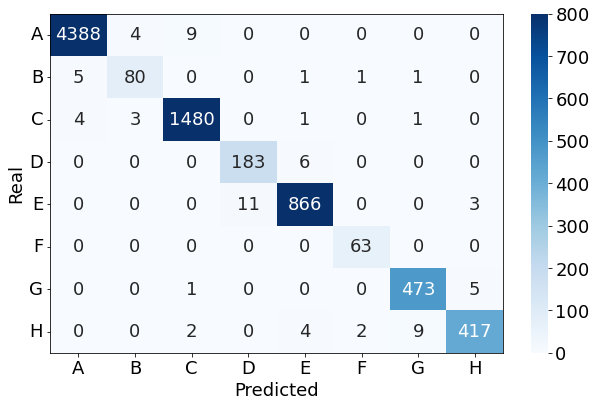

In [5]:
dt = DecisionTreeClassifier()
report_dt, accs_dt = evaluate_model(dt, X_train, y_train, X_test, y_test, labels, vmax=800,
                           rotation=(0,0), fname="Images/decisionTreeConfusion", display_labels=["A", "B", "C", "D", "E","F","G","H"], 
                           figsize=(9,6))

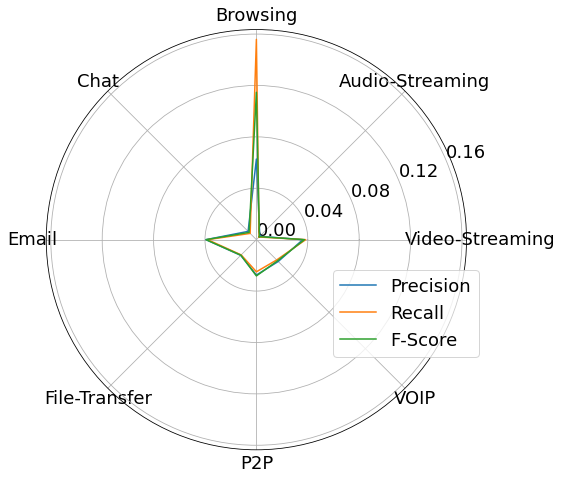

In [6]:
metrics_polar_plot(report_dt, labels, metrics, display, figsize=(8,8), 
                   fname="Images/measurement_comparison_DT", bbox_to_anchor=(1.35, 0.2, -0.3, 0.5))

100%|██████████| 10/10 [00:23<00:00,  2.36s/it, Test acc. #9=0.982]


               precision       recall       f1-score       support       
Audio-Streaming:  99.51		99.03		99.27		88830.00		
Browsing:         88.55		83.37		85.44		1750.00		
Chat:             98.44		99.05		98.74		30520.00		
Email:            97.20		95.93		96.54		3930.00		
File-Transfer:    98.26		97.17		97.70		17300.00		
P2P:              95.55		97.50		96.29		1570.00		
VOIP:             96.99		97.26		97.11		9860.00		
Video-Streaming:  91.11		96.05		93.50		9120.00		


 10-fold Accuracy: 98.31%
Test accuracy: 98.23%


Confusion matrix:
[[4360    2   16    0    6    0    0   17]
 [   7   74    3    0    0    0    1    3]
 [   9    4 1461    1   13    0    0    1]
 [   0    0    1  184    4    0    0    0]
 [   9    0    5    4  855    0    3    4]
 [   2    0    0    0    0   61    0    0]
 [   1    1    1    0    2    0  468    6]
 [   1    2    0    0    3    0   10  418]]

Audio-Streaming :   99.34%
Browsing :          89.16%
Chat :              98.25%
Email :             97.35%
File-Tr

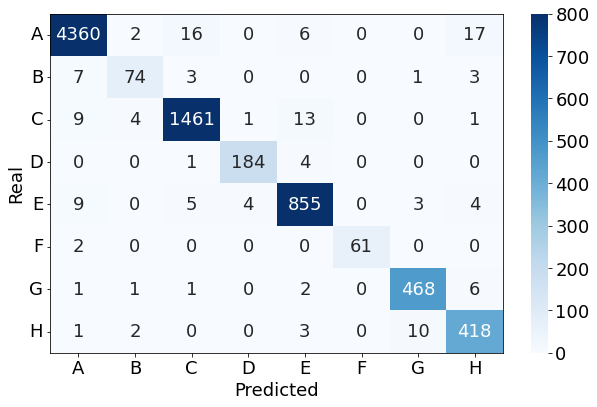

In [7]:
rf = RandomForestClassifier()
report_rf, accs_rf = evaluate_model(rf, X_train, y_train, X_test, y_test, labels, 
                         figsize=(9,6), rotation=(0,0), fname="Images/RandomForestConfusion",
                        display_labels=["A", "B", "C", "D", "E","F","G","H"], vmax=800)

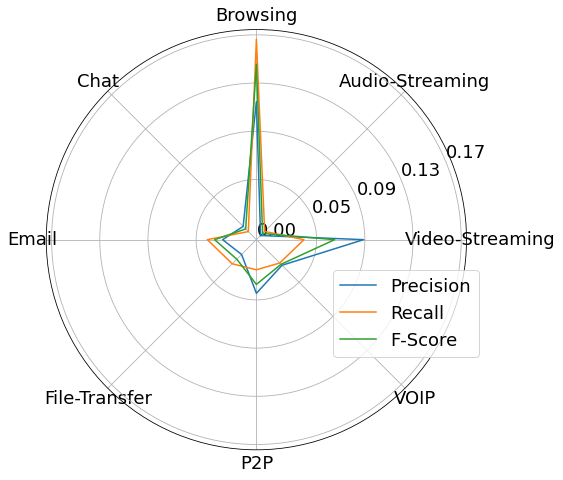

In [8]:
metrics_polar_plot(report_rf, labels, metrics, display, figsize=(8,8), 
                   fname="Images/measurement_comparison_RF", bbox_to_anchor=(1.35, 0.2, -0.3, 0.5))

In [9]:
scaler = MinMaxScaler(feature_range = (-1,1)) # StandardScaler
scaler.fit(X)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

100%|██████████| 10/10 [01:04<00:00,  6.47s/it, Test acc. #9=0.981]


               precision       recall       f1-score       support       
Audio-Streaming:  99.25		98.98		99.11		88830.00		
Browsing:         75.69		70.75		72.63		1750.00		
Chat:             98.74		98.72		98.72		30520.00		
Email:            89.30		87.06		87.30		3930.00		
File-Transfer:    95.37		94.39		94.84		17300.00		
P2P:              90.73		87.25		88.27		1570.00		
VOIP:             93.19		94.83		93.90		9860.00		
Video-Streaming:  90.89		94.52		92.58		9120.00		


 10-fold Accuracy: 97.24%
Test accuracy: 98.08%


Confusion matrix:
[[4371    4   21    0    1    0    2    2]
 [   9   69    3    0    0    4    3    0]
 [   2    5 1473    0    2    0    3    4]
 [   0    0    0  184    4    0    1    0]
 [   0    1    2   33  833    0    1   10]
 [   0    2    0    0    0   61    0    0]
 [   1    0    0    0    2    0  470    6]
 [   1    0    0    0    7    0   18  408]]

Audio-Streaming :   99.70%
Browsing :          85.19%
Chat :              98.27%
Email :             84.79%
File-Tr

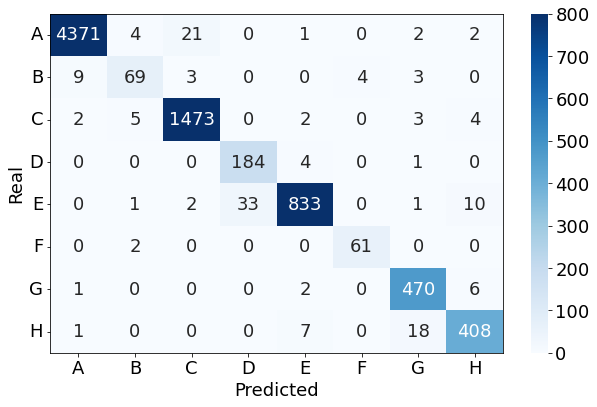

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=[20, 40, 20], learning_rate="adaptive", early_stopping=True)
report_mlp, accs_mlp = evaluate_model(mlp, scaled_X_train, y_train, scaled_X_test, y_test, labels, vmax=800,
                           rotation=(0,0), fname="Images/MultiLayerPerceptronConfusion", display_labels=["A", "B", "C", "D", "E","F","G","H"], 
                           figsize=(9,6))

In [14]:
accs = {models[0]: accs_dt, models[1]: accs_rf, models[2]: accs_mlp}
accs

{'Decision tree': {'Audio-Streaming': 99.79531498749147,
  'Browsing': 91.95402298850574,
  'Chat': 99.19571045576407,
  'Email': 94.3298969072165,
  'File-Transfer': 98.63325740318906,
  'P2P': 95.45454545454545,
  'VOIP': 97.72727272727273,
  'Video-Streaming': 98.11764705882354},
 'Random forest': {'Audio-Streaming': 99.33925723399408,
  'Browsing': 89.1566265060241,
  'Chat': 98.25151311365164,
  'Email': 97.35449735449735,
  'File-Transfer': 96.82899207248018,
  'P2P': 100.0,
  'VOIP': 97.0954356846473,
  'Video-Streaming': 93.0957683741648},
 'Multilayer perceptron': {'Audio-Streaming': 99.70346715328468,
  'Browsing': 85.18518518518519,
  'Chat': 98.26551034022681,
  'Email': 84.7926267281106,
  'File-Transfer': 98.11542991755006,
  'P2P': 93.84615384615384,
  'VOIP': 94.37751004016064,
  'Video-Streaming': 94.88372093023256}}

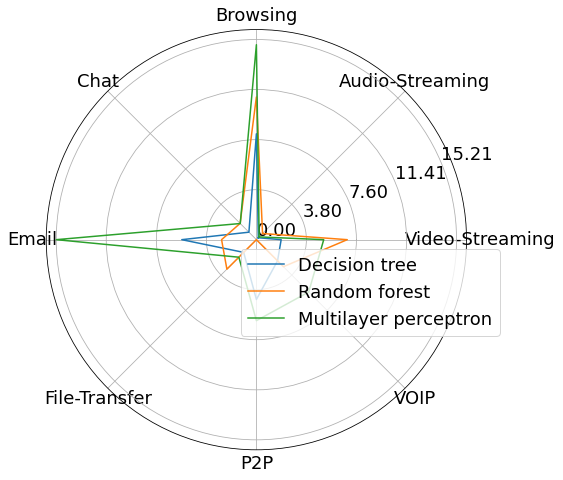

In [15]:
accuracy_polar_plot(accs, labels, models, figsize=(8,8), 
                    bbox_to_anchor=(1, 0.25, 0.1,4), fname='Images/acuracyComparison')

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import *

In [17]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_dt = cross_val_score(dt, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=10)
print("Decision tree mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_dt)*100, np.std(scores_dt)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:   33.8s remaining:    4.5s


Decision tree mean accuracy: 99.154% (0.219)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.0s finished


In [18]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=10)
print("Random forest mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_rf)*100, np.std(scores_rf)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  1.2min remaining:   10.0s


Random forest mean accuracy: 98.773% (0.241)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [19]:
scaler = MinMaxScaler(feature_range = (-1,1)) # StandardScaler
scaler.fit(X)
scaled_X = scaler.transform(X)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
scores_mlp = cross_val_score(mlp, scaled_X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=10)
print("Multilayer perceptron mean accuracy: %.3f%% (%.3f)" % (np.mean(scores_mlp)*100, np.std(scores_mlp)*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  2.4min remaining:   19.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


Multilayer perceptron mean accuracy: 97.818% (0.436)


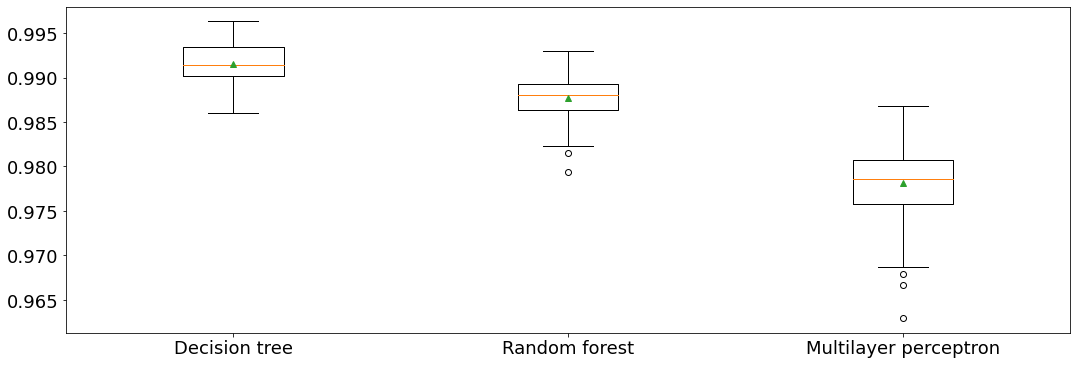

In [20]:
plt.boxplot([scores_dt, scores_rf, scores_mlp], labels=['Decision tree', 'Random forest', "Multilayer perceptron"], showmeans=True)
plt.show()

In [21]:
t, p = paired_ttest_5x2cv(estimator1=dt, estimator2=rf, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 3.490
p value: 0.017
Difference between mean performance is probably real


In [22]:
t, p = paired_ttest_5x2cv(estimator1=dt, estimator2=mlp, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 3.438
p value: 0.018
Difference between mean performance is probably real


In [23]:
t, p = paired_ttest_5x2cv(estimator1=rf, estimator2=mlp, X=X, y=y)
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

t statistic: 14.629
p value: 0.000
Difference between mean performance is probably real
